# Project 1: fys-stk4155

Import python packages

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from imageio import imread

## Generate random data and make a plot of using the Franke function

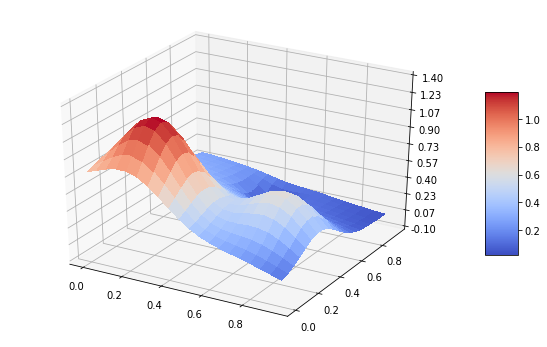

In [2]:
from utils import franke_function
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = franke_function(x, y)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Select the models

## Select the models in terms of the parameters that minimize the MSE and the R2 scores

Import our functions written for this project

In [3]:
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0
from functions import generateDesignmatrix

# Generate a random sample to test our code with the Franke function

In [4]:
# we use this seed in order to raplicate the experiment with the same data
np.random.seed(1000)  

# Data
x = np.random.rand(1000, )
y = np.random.rand(1000, )
z = franke_function(x, y)

# Experimental setup

## Define the models and the parameters that we want to compare.
The model are Ordinary Least Squares (OLS), Ridge and Lasso.
The parameter are []


In [5]:
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
 
The sample is splitted leaving 80% of the data for training the model and 20% for testing it.

The polynomial order varies from 1 to 5.

The polynomial order is: 1
Testing model: ridge
3
Testing model: ols
0
Testing model: lasso
0
The polynomial order is: 2
Testing model: ridge
3
Testing model: ols
0
Testing model: lasso
0


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The polynomial order is: 3
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
The polynomial order is: 4
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
The polynomial order is: 5
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0


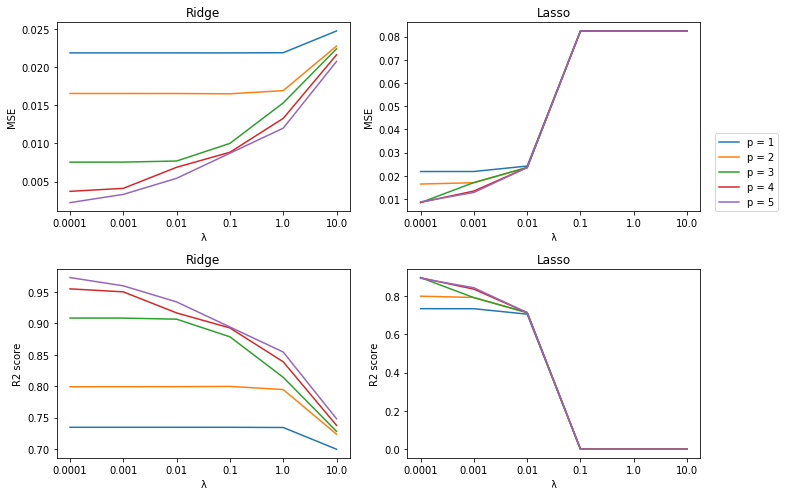

Testing model: ridge
3
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
3
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0
Testing model: ridge
0
Testing model: ols
0
Testing model: lasso
0


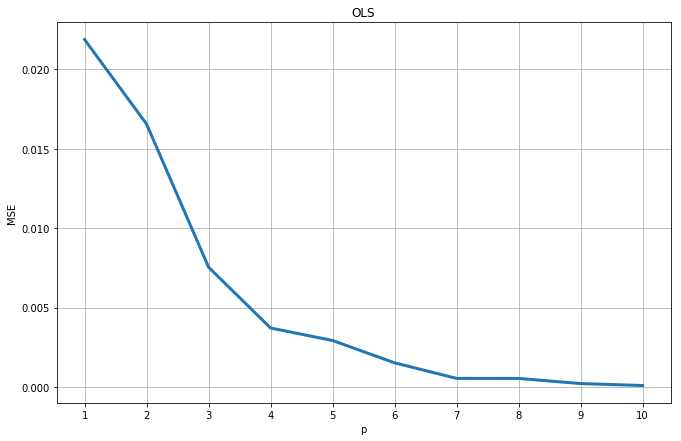

In [30]:
import matplotlib.pyplot as plt
mse_ols = []
for p in np.arange(1,6,1):
    print('The polynomial order is:', p)
    X = generateDesignmatrix(p,x,y)
    
    results, z_pred_best = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )

    # write loop instead of repeating code!!!
    
    # One figure for MSE and all pol. orders

    # Subplot for ridge
    plt.figure(1, figsize = (11,7))
    plt.subplot(221)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["mse"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.subplot(222)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["mse"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)


     # One figure for R2 and all pol. orders
    # Subplot for ridge
    plt.subplot(223)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["r2"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.subplot(224)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["r2"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    
    mse_ols.append(results["mse"]["ols"][0])

    
#plt.savefig("results/figures/MSEvsLambda/MSEvsLambda_seed105.png")
plt.tight_layout()    
plt.show()

mse_ols = []
for p in np.arange(1,11,1):
    X = generateDesignmatrix(p,x,y)
    
    results, z_pred_best = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )
    mse_ols.append(results["mse"]["ols"][0])

    # Plot MSE for OLS
p = np.arange(1,11,1)

plt.figure(2, figsize = (11,7))
# log x-axis
plt.plot(p, mse_ols, linewidth=3.0) # plot ridge
ax = plt.gca()
plt.xticks(p)
ax.set_title("OLS")
plt.xlabel('p')
plt.ylabel('MSE')
plt.grid(True)
#plt.savefig("results/figures/MSEvsLambda/OLS_MSEvsLambda_seed105_p10.png")
    
    

In [17]:
#results
mse_ols

[[0.021870156393560606],
 [0.016547629747465008],
 [0.00753748451289556],
 [0.0037104392341302628],
 [0.0029249987756259986]]

In [ ]:
X

In [ ]:
z.shape


# Run the code with SRTM data

## We selected images from Flekkefjord (Norway) and Montevideo (Uruguay)


In [ ]:
# Load the terrain
terrain_flekkefjord = imread('Montevideo.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We subset the data, and generate a squared not singular design matrix.

In [ ]:
lengthx = 200
lengthy = 150
terrain_flekkefjord = terrain_flekkefjord[0:lengthx,0:lengthy]
terrain_flekkefjord.shape


x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

x = np.arange(lengthx)
y = np.arange(lengthy)
# Generate a grid
x = np.squeeze(np.tile(x,[1,lengthy] ))
y = np.squeeze(np.tile(y,[1,lengthx] )) 
z = np.ndarray.flatten(terrain_flekkefjord)

p = 5
X = generateDesignmatrix(p,x,y)


In [ ]:
# Experimental setup
# Don't use alpha=0.001 because it can cause precision problems

results_flekkefjord, z_pred_flekkefjord =  model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )

In [ ]:
results_flekkefjord

In [ ]:
models.items

Follow example in Piazza

In [ ]:
import numpy as np
# from scipy.misc import imread
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def surface_plot(surface, title, surface1=None, title1 = None):
    M, N = surface.shape

    ax_rows = np.arange(M)
    ax_cols = np.arange(N)

    [X, Y] = np.meshgrid(ax_cols, ax_rows)

    fig = plt.figure()
    # Plot the predicted and the original surface
    if surface1 is not None:
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        ax.plot_surface(X, Y, surface, cmap=cm.viridis, linewidth=0)
        plt.title(title)

        ax = fig.add_subplot(1, 2, 2, projection='3d')
        ax.plot_surface(X, Y, surface1, cmap=cm.viridis, linewidth=0)
        plt.title(title1)
    # Plot only the predicted surface
    else:
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, surface, cmap=cm.viridis, linewidth=0)
        plt.title(title)


def predict(rows, cols, beta):
    out = np.zeros((np.size(rows), np.size(cols)))

    for i, y_ in enumerate(rows):
        for j, x_ in enumerate(cols):
            data_vec = np.array([1, x_, y_, x_ ** 2, x_ * y_, y_ ** 2, \
                                 x_ ** 3, x_ ** 2 * y_, x_ * y_ ** 2, y_ ** 3, \
                                 x_ ** 4, x_ ** 3 * y_, x_ ** 2 * y_ ** 2, x_ * y_ ** 3, y_ ** 4, \
                                 x_ ** 5, x_ ** 4 * y_, x_ ** 3 * y_ ** 2, x_ ** 2 * y_ ** 3, x_ * y_ ** 4,
                                 y_ ** 5])  # ,\
            #    x_**6, x_**5*y_, x_**4*y_**2, x_**3*y_**3,x_**2*y_**4, x_*y_**5, y_**6, \
            #    x_**7, x_**6*y_, x_**5*y_**2, x_**4*y_**3,x_**3*y_**4, x_**2*y_**5, x_*y_**6, y_**7, \
            #    x_**8, x_**7*y_, x_**6*y_**2, x_**5*y_**3,x_**4*y_**4, x_**3*y_**5, x_**2*y_**6, x_*y_**7,y_**8, \
            #    x_**9, x_**8*y_, x_**7*y_**2, x_**6*y_**3,x_**5*y_**4, x_**4*y_**5, x_**3*y_**6, x_**2*y_**7,x_*y_**8, y_**9])
            out[i, j] = data_vec @ beta

    return out


from sklearn.metrics import mean_squared_error

if __name__ == '__main__':

    # Load the terrain
    terrain1 = imread('Montevideo.tif')
    [n, m] = terrain1.shape

    ## Find some random patches within the dataset and perform a fit

    patch_size_row = 50
    patch_size_col = 60

    # Define their axes
    rows = np.linspace(0, 1, patch_size_row)
    cols = np.linspace(0, 1, patch_size_col)

    [C, R] = np.meshgrid(cols, rows)

    x = C.reshape(-1, 1)
    y = R.reshape(-1, 1)

    num_data = patch_size_row * patch_size_col

    # Find the start indices of each patch

    num_patches = 5

    np.random.seed(41555)

    row_starts = np.random.randint(0, n - patch_size_row, num_patches)
    col_starts = np.random.randint(0, m - patch_size_col, num_patches)

    for i, row_start, col_start in zip(np.arange(num_patches), row_starts, col_starts):
        row_end = row_start + patch_size_row
        col_end = col_start + patch_size_col

        patch = terrain1[row_start:row_end, col_start:col_end]

        z = patch.reshape(-1, 1)
        
        print('x', x.shape, 'y', y.shape, 'z', z.shape)

        # Perform OLS fit
        data = np.c_[np.ones((num_data, 1)), x, y, \
                     x ** 2, x * y, y ** 2, \
                     x ** 3, x ** 2 * y, x * y ** 2, y ** 3, \
                     x ** 4, x ** 3 * y, x ** 2 * y ** 2, x * y ** 3, y ** 4, \
                     x ** 5, x ** 4 * y, x ** 3 * y ** 2, x ** 2 * y ** 3, x * y ** 4, y ** 5]  # , \
        # x**6, x**5*y, x**4*y**2, x**3*y**3,x**2*y**4, x*y**5, y**6, \
        # x**7, x**6*y, x**5*y**2, x**4*y**3,x**3*y**4, x**2*y**5, x*y**6, y**7, \
        # x**8, x**7*y, x**6*y**2, x**5*y**3,x**4*y**4, x**3*y**5, x**2*y**6, x*y**7,y**8, \
        # x**9, x**8*y, x**7*y**2, x**6*y**3,x**5*y**4, x**4*y**5, x**3*y**6, x**2*y**7,x*y**8, y**9]

        beta_ols = np.linalg.inv(data.T @ data) @ data.T @ z

        fitted_patch = predict(rows, cols, beta_ols)

        mse = np.sum((fitted_patch - patch) ** 2) / num_data
        R2 = 1 - np.sum((fitted_patch - patch) ** 2) / np.sum((patch - np.mean(patch)) ** 2)
        var = np.sum((fitted_patch - np.mean(fitted_patch)) ** 2) / num_data
        bias = np.sum((patch - np.mean(fitted_patch)) ** 2) / num_data

        print("patch %d, from (%d, %d) to (%d, %d)" % (i + 1, row_start, col_start, row_end, col_end))
        print("mse: %g\nR2: %g" % (mse, R2))
        print("variance: %g" % var)
        print("bias: %g\n" % bias)

        surface_plot(fitted_patch, 'Fitted terrain surface', patch, 'Real terrain surface')
        plt.show()
        
        
        
        
        p= 5
        X = generateDesignmatrix(p,np.squeeze(x),np.squeeze(y))
        
        
        results_flekkefjord, z_pred_flekkefjord =  model_comparison0(
            models, param_grid, X, z, split_size=0.2
        )


In [ ]:
X.shape


In [ ]:
rows

In [ ]:
import scipy as sp
np.linalg.inv(X.T @ X)

In [ ]:
print(data.shape)

print(x.shape)

print(y.shape)

print(z.shape)


In [ ]:


beta_ols = np.linalg.inv(data.T @ data) @ data.T @ z

In [ ]:
X = generateDesignmatrix(p,np.squeeze(x),np.squeeze(y))

In [ ]:
z_pred_flekkefjord['ridge'] .shape




In [ ]:

fitted_patch.shape

In [ ]:
50*60
